# Figures for ReligiosityVBM

In [9]:
import os.path as op
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn.datasets import load_mni152_template
%matplotlib inline

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


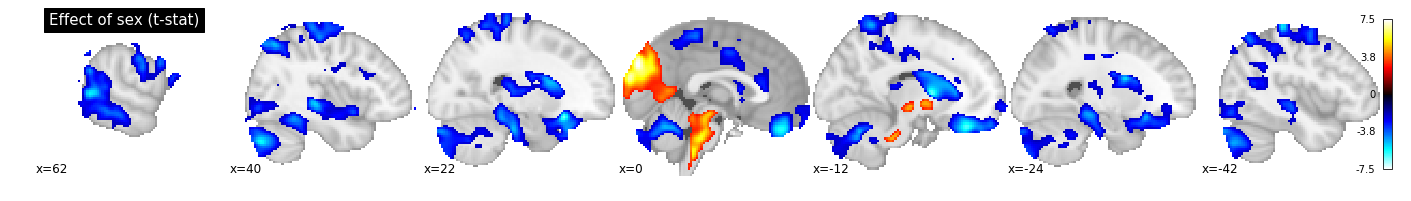

In [28]:
img_dir = '../bids/derivatives/neurovault'
affine = load_mni152_template().affine

gender_mf_p = nib.load(op.join(img_dir, 'gender_m>f_tfce_corr_tstat.nii.gz')).get_data()
gender_mf_p[gender_mf_p < 0.95] = 0
gender_fm_p = nib.load(op.join(img_dir, 'gender_f>m_tfce_corr_tstat.nii.gz')).get_data()
gender_fm_p[gender_fm_p < 0.95] = 0
gender_mask = (gender_mf_p > 0) + (gender_fm_p > 0)

gender_mf_tstat = nib.load(op.join(img_dir, 'gender_m>f_tstat.nii.gz')).get_data()
gender_mf_tstat[~gender_mask] = 0

plotting.plot_stat_map(
    nib.Nifti1Image(gender_mf_tstat, affine),
    draw_cross=False,
    display_mode='x',
    title='Effect of sex (t-stat)'
)

0


/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/opt/conda/lib/python3.6/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


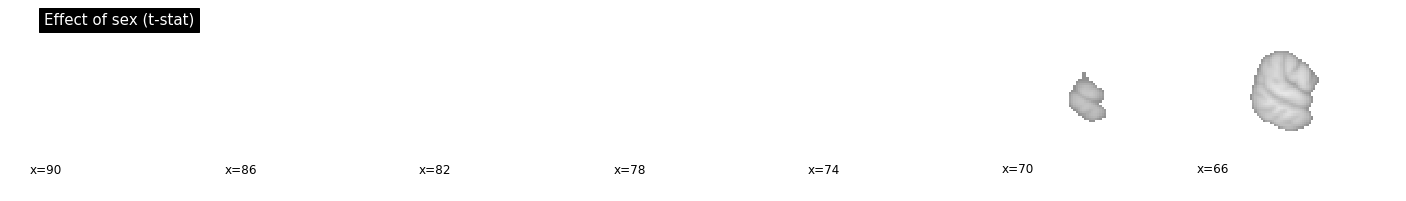

In [35]:
reli_pos_p = nib.load(op.join(img_dir, 'religiosity_pos_tfce_corr_tstat.nii.gz')).get_data()
reli_pos_p[reli_pos_p < 0.95] = 0
reli_neg_p = nib.load(op.join(img_dir, 'religiosity_neg_tfce_corr_tstat.nii.gz')).get_data()
reli_neg_p[reli_neg_p < 0.95] = 0
reli_mask = (reli_pos_p > 0) + (reli_neg_p > 0)

reli_pos_tstat = nib.load(op.join(img_dir, 'religiosity_pos_tstat.nii.gz')).get_data()
reli_pos_tstat[~reli_mask] = 0

print(reli_mask.sum())

plotting.plot_stat_map(
    nib.Nifti1Image(reli_pos_tstat, affine),
    draw_cross=False,
    display_mode='x',
    title='Effect of sex (t-stat)'
)

0


/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/opt/conda/lib/python3.6/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


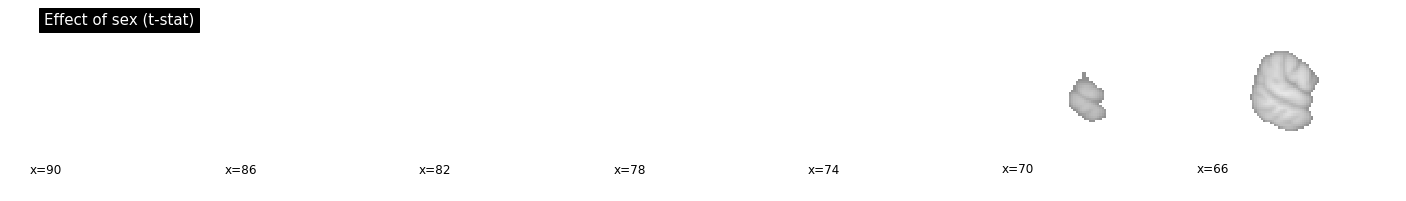

In [36]:
mys_pos_p = nib.load(op.join(img_dir, 'mysticalexp_pos_tfce_corr_tstat.nii.gz')).get_data()
mys_pos_p[mys_pos_p < 0.95] = 0
mys_neg_p = nib.load(op.join(img_dir, 'mysticalexp_neg_tfce_corr_tstat.nii.gz')).get_data()
mys_neg_p[mys_neg_p < 0.95] = 0
mys_mask = (mys_pos_p > 0) + (mys_neg_p > 0)

mys_pos_tstat = nib.load(op.join(img_dir, 'mysticalexp_pos_tstat.nii.gz')).get_data()
mys_pos_tstat[~mys_mask] = 0

print(mys_mask.sum())

plotting.plot_stat_map(
    nib.Nifti1Image(mys_pos_tstat, affine),
    draw_cross=False,
    display_mode='x',
    title='Effect of sex (t-stat)'
)

/opt/conda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


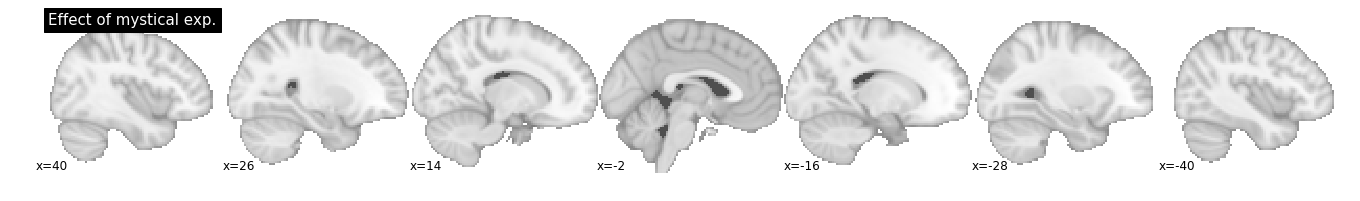

In [42]:
plotting.plot_anat(display_mode='x', title='Effect of mystical exp.')